Start by watching [this recording](https://www.youtube.com/watch?v=_6icrFGtwrM).
Then, solve the exercises here
                                
<--------------------------------------------------------------------|

You may use this cheat sheet:

## Intro to NumPy

**NumPy** is the fundamental package for scientific computing with Python.

In [1]:
import numpy as np

### numpy.ndarray

#### What is a numpy array?

An `ndarray` (N-dimensional array) is a multi-dimensional container of items.

In [2]:
# Constructing a single-dimensional array
arr1 = np.array([1, 2, 3, 4, 5, 6])
arr1

array([1, 2, 3, 4, 5, 6])

In [3]:
# Constructing a multi-dimensional array
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
arr2

array([[1, 2, 3],
       [4, 5, 6]])

In an `ndarray`, all items must be of the same type.

In [4]:
arr1.dtype

dtype('int32')

#### ndarray methods

An `ndarray` object has many methods which operate on or with the array in some fashion.

In [5]:
arr1.sum()

21

#### Arithmetic operations on ndarrays

Arithmetic operations on `ndarray` operate on each element individually, and generally yield `ndarray` objects as results.

In [6]:
arr1 * 2

array([ 2,  4,  6,  8, 10, 12])

Note the difference between the behavior of `ndarray` and standard python lists:

In [7]:
lst1 = [1, 2, 3, 4, 5, 6]

In [8]:
lst1 * 2

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

#### Comparison operations on ndarrays

Like arithmetic operations, comparison operations are element-wise operations.

In [9]:
arr1 > 3

array([False, False, False,  True,  True,  True])

#### Logical operations on ndarrays

The bitwise operators &, | and ~ may be used for the logical operations *and*, *or* and *not*. Make sure to use parentheses when applying logical operations.

In [10]:
(arr1 % 2 == 0) & ~(arr1 == 6)

array([False,  True, False,  True, False, False])

#### Indexing and slicing ndarrays

`ndarray` can be indexed using the standard Python `x[obj]` syntax, where *x* is the array and *obj* the selection.

In [11]:
arr1[4]

5

The selection may consist of multiple elements.

In [12]:
arr1[[4, 5]]

array([5, 6])

`ndarray` can also be sliced using the standard Python syntax for slicing: `x[start:stop:step]`

In [13]:
arr1[4:]

array([5, 6])

Finally, `ndarray` can be indexed using boolean arrays.

In [14]:
arr1[[True, True, False, True, False, False]]

array([1, 2, 4])

We can mix comparison operators and boolean arrays indexing.

In [15]:
arr1[(arr1 % 2 == 0) & ~(arr1 == 6)]

array([2, 4])

## Intro to Pandas

**Pandas** is a Python library for data manipulation and analysis.

In [16]:
import pandas as pd

### pandas.series

#### What is a pandas series?

`Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

#### Constructing a pandas Series

The basic method to create a `Series` is to call:

`s = pd.Series(data, index=index)`

In [17]:
animals_lifespan = pd.Series([15, 3.5, 50, 28], ['Badger', 'Chameleon', 'Donkey', 'Giraffe'])
animals_lifespan

Badger       15.0
Chameleon     3.5
Donkey       50.0
Giraffe      28.0
dtype: float64

We can also construct a `Series` from a `dict`.

In [18]:
animals_lifespan_2 = pd.Series({'Badger': 15, 'Chameleon': 3.5, 'Donkey': 50, 'Giraffe': 28})
animals_lifespan_2

Badger       15.0
Chameleon     3.5
Donkey       50.0
Giraffe      28.0
dtype: float64

#### The internals of the pandas Series

a `Series` consists of:
* The `values`

In [19]:
animals_lifespan.values

array([15. ,  3.5, 50. , 28. ])

* The `index`

In [20]:
animals_lifespan.index

Index(['Badger', 'Chameleon', 'Donkey', 'Giraffe'], dtype='object')

In addition, `Series` may also have a `name` attribute.

In [21]:
animals_lifespan.name = 'animals_lifespan'
animals_lifespan

Badger       15.0
Chameleon     3.5
Donkey       50.0
Giraffe      28.0
Name: animals_lifespan, dtype: float64

#### pandas.series is ndarray-like

`Series` is a wrapper for `ndarray`. Everything so far that applied for `ndarray`, applies for `Series`.

In [22]:
animals_lifespan - 5

Badger       10.0
Chameleon    -1.5
Donkey       45.0
Giraffe      23.0
Name: animals_lifespan, dtype: float64

**[?]** How can we select the animals that have a lifespan of 25 years or longer?

In [23]:
animals_lifespan[animals_lifespan >= 25]

Donkey     50.0
Giraffe    28.0
Name: animals_lifespan, dtype: float64

Just like with `ndarray`, all items in a `Series` must be of the same type.

In [24]:
animals_lifespan.dtype

dtype('float64')

#### Getting, setting and deleting elements in Series

Getting an element by index:

In [25]:
animals_lifespan['Badger']

15.0

Setting a new element or changing an existing one:

In [26]:
animals_lifespan['Lion'] = 35
animals_lifespan

Badger       15.0
Chameleon     3.5
Donkey       50.0
Giraffe      28.0
Lion         35.0
Name: animals_lifespan, dtype: float64

Dropping an existing element:

In [27]:
animals_lifespan.drop('Lion')

Badger       15.0
Chameleon     3.5
Donkey       50.0
Giraffe      28.0
Name: animals_lifespan, dtype: float64

Notice this doesn't actually change `animals_lifespan`, just returns a modified copy. Two ways to modify the original object:

In [28]:
animals_lifespan = animals_lifespan.drop('Lion')

In [29]:
animals_lifespan.drop('Donkey', inplace=True)

In [30]:
animals_lifespan

Badger       15.0
Chameleon     3.5
Giraffe      28.0
Name: animals_lifespan, dtype: float64

### pandas.dataframe

#### What is a pandas DataFrame?

`DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a `dict` of `Series` objects. It is generally the most commonly used pandas object.

#### Constructing a pandas DataFrame

There are many ways to construst a `DataFrame`. Three common ways are:
* From a `list` of `list`s

In [31]:
animals_df = pd.DataFrame([[15, 0.25], [3.5, 0.05], [50, 1.2], [28, 5.5]],
                          columns=['lifespan', 'height'],
                          index=['Badger', 'Chameleon', 'Donkey', 'Giraffe'])
animals_df

,lifespan,height
Badger,15.0,0.25
Chameleon,3.5,0.05
Donkey,50.0,1.20
Giraffe,28.0,5.50


* From a `dict` of `Series` objects.

In [32]:
animals_df_2 = pd.DataFrame({'lifespan': pd.Series({'Badger': 15, 'Chameleon': 3.5, 'Donkey': 50, 'Giraffe': 28}),
                             'height': pd.Series({'Badger': 0.25, 'Chameleon': 0.05, 'Donkey': 1.2, 'Giraffe': 5.5})})
animals_df_2

,lifespan,height
Badger,15.0,0.25
Chameleon,3.5,0.05
Donkey,50.0,1.20
Giraffe,28.0,5.50


* From a file (we will cover this later)

#### The internals of the pandas DataFrame

a `DataFrame` consists of three parts:
* The `values`

In [33]:
animals_df.values

array([[15.  ,  0.25],
       [ 3.5 ,  0.05],
       [50.  ,  1.2 ],
       [28.  ,  5.5 ]])

* The `columns`

In [34]:
animals_df.columns

Index(['lifespan', 'height'], dtype='object')

* The `index`

In [35]:
animals_df.index

Index(['Badger', 'Chameleon', 'Donkey', 'Giraffe'], dtype='object')

### Indexing and Selecting Data

#### Getting and setting a cell in a DataFrame

In [36]:
animals_df.loc['Giraffe', 'height']

5.5

In [37]:
animals_df.loc['Giraffe', 'height'] = 5.60
animals_df

,lifespan,height
Badger,15.0,0.25
Chameleon,3.5,0.05
Donkey,50.0,1.20
Giraffe,28.0,5.60


#### Getting, setting and deleting rows in a DataFrame

Selecting a row by index:

In [38]:
# Same as animals_df.loc['Badger', :]
animals_df.loc['Badger']

lifespan    15.00
height       0.25
Name: Badger, dtype: float64

Setting a new row or modifying an existing one:

In [39]:
animals_df.loc['Lion'] = {'lifespan': 35, 'height': 1.2}
animals_df

,lifespan,height
Badger,15.0,0.25
Chameleon,3.5,0.05
Donkey,50.0,1.20
Giraffe,28.0,5.60
Lion,35.0,1.20


Delete an existing row:

In [40]:
animals_df = animals_df.drop('Lion')
animals_df

,lifespan,height
Badger,15.0,0.25
Chameleon,3.5,0.05
Donkey,50.0,1.20
Giraffe,28.0,5.60


#### Getting, setting and deleting columns in a DataFrame

Getting a column by name:

In [41]:
# Same as animals_df.loc[:, 'lifespan']
animals_df['lifespan']

Badger       15.0
Chameleon     3.5
Donkey       50.0
Giraffe      28.0
Name: lifespan, dtype: float64

In [42]:
animals_df['mass'] = pd.Series({'Badger': 12, 'Chameleon': 0.1, 'Donkey': 250, 'Giraffe': 800})
animals_df

,lifespan,height,mass
Badger,15.0,0.25,12.0
Chameleon,3.5,0.05,0.1
Donkey,50.0,1.20,250.0
Giraffe,28.0,5.60,800.0


In [43]:
animals_df['bmi'] = animals_df['mass'] / (animals_df['height'] ** 2)
animals_df

,lifespan,height,mass,bmi
Badger,15.0,0.25,12.0,192.000000
Chameleon,3.5,0.05,0.1,40.000000
Donkey,50.0,1.20,250.0,173.611111
Giraffe,28.0,5.60,800.0,25.510204


Dropping a column:

In [44]:
animals_df = animals_df.drop('bmi', axis=1)
animals_df

,lifespan,height,mass
Badger,15.0,0.25,12.0
Chameleon,3.5,0.05,0.1
Donkey,50.0,1.20,250.0
Giraffe,28.0,5.60,800.0


### IO Tools

#### Reading/Writing spreadsheets

To read data, we can use `pd.read_csv`, `pd.read_excel` and others.

To write data, we can use `pd.DataFrame.to_csv`, `pd.DataFrame.to_excel` and others.

In [45]:
weather = pd.read_csv('weather.csv')

### Some essential basic functionality

#### .head() and .tail()

We have a pretty large dataset. Let's look at the first and last rows, using `head` and `tail`.

In [46]:
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [47]:
weather.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


#### .sample()

Returns a random sample of items.

In [48]:
weather.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
3230,2012-05-14 14:00:00,23.2,8.5,39,0,48.3,101.24,Mainly Clear
3639,2012-05-31 15:00:00,18.1,5.8,44,19,48.3,100.83,Mostly Cloudy
6943,2012-10-16 07:00:00,4.8,0.8,75,15,24.1,100.18,Mostly Cloudy
8611,2012-12-24 19:00:00,-9.7,-13.1,76,7,25.0,101.43,Mainly Clear
7263,2012-10-29 15:00:00,16.6,9.6,63,33,24.1,100.09,Cloudy


### Working with text data

Another functionality `Series` has is the ability to run string operations on it, using `.str`.

In [49]:
weather[weather['Weather'].str.contains('Snow')].sample(10)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8669,2012-12-27 05:00:00,-7.5,-9.1,88,43,1.2,100.95,Snow
1246,2012-02-21 22:00:00,-0.6,-4.5,75,6,25.0,100.35,Snow
8543,2012-12-21 23:00:00,1.1,0.0,92,30,9.7,97.79,"Drizzle,Snow,Fog"
8583,2012-12-23 15:00:00,-6.8,-11.1,71,13,24.1,100.34,Snow Showers
2094,2012-03-28 06:00:00,-0.3,-3.5,79,20,24.1,100.51,Snow
768,2012-02-02 00:00:00,-5.0,-8.2,78,7,12.9,101.32,Snow
8007,2012-11-29 15:00:00,-1.2,-4.6,78,22,24.1,101.40,Snow
1334,2012-02-25 14:00:00,-3.2,-6.3,79,35,3.2,99.05,Snow
1475,2012-03-02 11:00:00,-5.5,-7.5,86,15,2.8,101.21,Snow
302,2012-01-13 14:00:00,-4.8,-7.0,85,6,2.0,98.07,Snow


### Time Series / Date functionality

We want the *Date/Time* column to be a datetime object. Lucky for us, we can easily parse the dates upon creation:

In [50]:
weather = pd.read_csv('weather.csv', parse_dates=['Date/Time'])

In [51]:
print(weather['Date/Time'].dtype)

datetime64[ns]


pandas has a `Timestamp` object, that is similar to `datetime.datetime`.

Now we can use datetime functions on the data, using `.dt`.

In [52]:
weather[weather['Date/Time'].dt.dayofweek == 0].head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
28,2012-01-02 04:00:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy


pandas also has a `Timedelta` object, similar to `datetime.timedelta`.

In [53]:
weather['Date/Time'] = weather['Date/Time'] + pd.Timedelta(hours=1)
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 01:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 02:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 03:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 04:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 05:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


**[?]** How can we create another column for a month?

In [54]:
weather['Month'] = weather['Date/Time'].dt.month
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Month
0,2012-01-01 01:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1
1,2012-01-01 02:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2,2012-01-01 03:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
3,2012-01-01 04:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
4,2012-01-01 05:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1


### Some more essential basic functionality

#### Sorting a DataFrame

In [55]:
weather.sort_values('Temp (C)').head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Month
344,2012-01-15 09:00:00,-23.3,-28.5,62,7,24.1,102.45,Clear,1
342,2012-01-15 07:00:00,-23.2,-28.5,62,7,25.0,102.28,Mostly Cloudy,1
343,2012-01-15 08:00:00,-22.8,-28.0,62,9,25.0,102.37,Mainly Clear,1
345,2012-01-15 10:00:00,-22.2,-27.8,60,9,48.3,102.57,Mainly Clear,1
338,2012-01-15 03:00:00,-21.4,-26.6,63,9,25.0,101.99,Cloudy,1


### Group by

In [56]:
weather.groupby('Month', sort=False).mean()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Month,,,,,,
1,-7.362366,-12.284274,68.392473,18.119624,22.102419,101.004046
2,-4.227443,-9.219828,68.981322,14.826149,25.184626,101.142198
3,3.112366,-3.494355,64.873656,14.555108,26.155108,101.335551
4,6.995972,-1.941389,56.169444,17.361111,31.777083,100.715917
5,16.235484,8.072177,61.737903,12.845430,29.418548,101.057527
6,20.120833,11.722500,60.630556,14.686111,32.104167,100.785764
7,22.790726,14.590591,61.991935,11.887097,33.655108,100.827728
8,22.280645,15.653226,67.975806,13.922043,30.192608,100.926667
9,16.497361,10.760278,71.113889,14.102778,30.629306,101.089458


### Visualization

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
monthly_weather_stats = weather.groupby('Month', sort=False).mean()

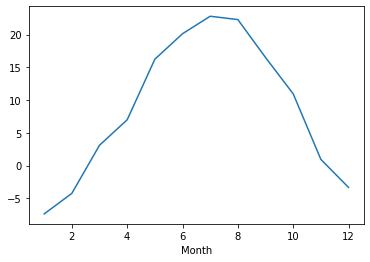

In [59]:
monthly_weather_stats['Temp (C)'].plot()

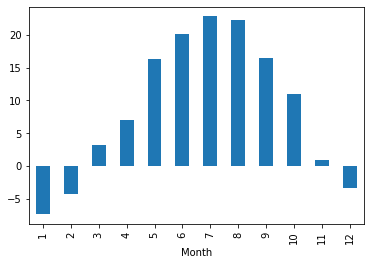

In [60]:
monthly_weather_stats['Temp (C)'].plot(kind='bar')